## Machine Learning 

We gaan kijken wat er mogelijk is met machine learning, door een van de fietssnelroutes te vergelijken. 

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn import metrics

# To show correlation within the data
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45) 
    plt.show()

# I took this from the titanic exercise 
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")

    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")


In [3]:
pd_2015 = gpd.read_file('data/Oss - Den Bosch 2015.geojson')
pd_2016 = gpd.read_file('data/Oss - Den Bosch 2016.geojson')
pd_2017 = gpd.read_file('data/Oss - Den Bosch 2017.geojson')

In [4]:
pd_2016

,LINKNUMMER,SOURCE,TARGET,HIGHWAY,SPEED,INTENSITEI,INTENSI_01,SNELHEID_R,OBJECTID,PROVINCIE,id,Plaats,geometry
0,1527655,568479696,568479701,cycleway,18.00180,6,3,0.93122,11,Noord-Brabant,16,Oss,(LINESTRING (164270.5224327579 419133.84561816...
1,2553911,-1408038281,-1425891393,secondary,22.48580,26,4,0.92234,11,Noord-Brabant,11,'S-Hertogenbosch,(LINESTRING (148497.8567267049 411421.42623234...
2,904026,43585015,43586000,residential,14.80370,2,3,0.90504,11,Noord-Brabant,11,'S-Hertogenbosch,(LINESTRING (150504.1297604526 412968.51038334...
3,144737,43724220,43725570,tertiary,19.97460,21,15,0.85375,11,Noord-Brabant,15,Geffen,(LINESTRING (160453.9842847649 417356.01914063...
4,782898,43764251,-1998105643,residential,22.04310,24,18,0.90379,11,Noord-Brabant,16,Oss,(LINESTRING (165264.8786872219 418844.57308926...
5,782767,43760321,43761905,residential,0.00000,0,1,0.00000,11,Noord-Brabant,16,Oss,(LINESTRING (165202.4919832853 418702.01789817...
6,1467011,431594896,43592899,footway,0.00000,0,1,0.00000,11,Noord-Brabant,11,'S-Hertogenbosch,(LINESTRING (150095.0728972359 413257.60592258...
7,804597,43796738,43796925,pedestrian,9.84651,1,0,0.44044,11,Noord-Brabant,16,Oss,(LINESTRING (164437.4540379457 420184.65527650...
8,811306,43569999,43569529,cycleway,7.39974,1,0,0.37036,11,Noord-Brabant,11,'S-Hertogenbosch,(LINESTRING (151809.7975899305 412456.58402938...
9,903952,431594893,43592362,cycleway,0.00000,0,2,0.00000,11,Noord-Brabant,11,'S-Hertogenbosch,(LINESTRING (150036.0616566008 413196.85244560...


In [5]:
#  Cleaning data for machine learning

In [6]:
import sklearn as sk
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

# Map highway
pd_2016['HIGHWAY_LABEL'] = pd_2016['HIGHWAY'].map({'cycleway' : 0, 'secondary': 1, 'residential': 2, 'tertiary': 3
                                                   , 'footway': 4, 'pedestrian': 5, 'unclassified': 6, 'service': 7
                                                   , 'secondary_link': 8, 'path': 9,'steps': 10, 'track': 11 })

pd_2016['PLAATS_LABEL'] = pd_2016['Plaats'].map({'Oss': 0, "'S-Hertogenbosch": 1, 'Geffen': 2, 'Rosmalen': 3
                                                 , 'Nuland': 4,'Kruisstraat': 5})

pd_2016['INTENSITEI'] = pd_2016['INTENSITEI'].astype(float)
pd_2016['INTENSI_01'] = pd_2016['INTENSI_01'].astype(float)

# Speed, Intensiteit, Highway_label, plaats

/Users/robvangastel/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


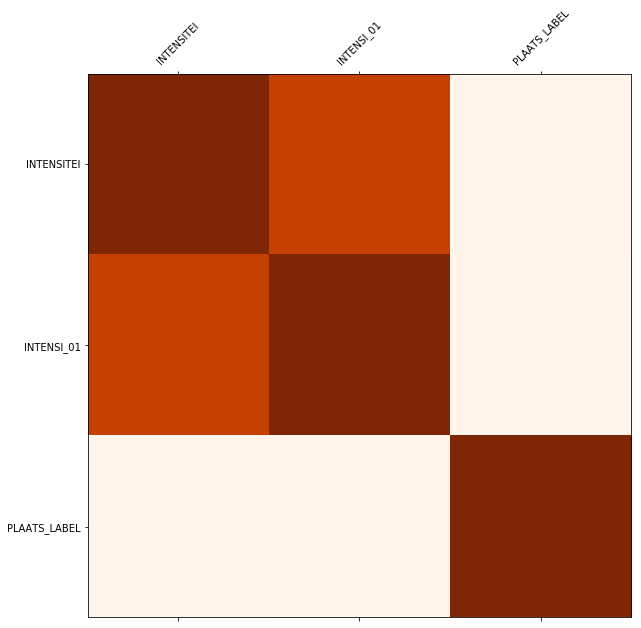

In [7]:
pd_2016 = pd_2016.dropna()

# Features
x = pd_2016[['INTENSITEI', 'INTENSI_01', 'PLAATS_LABEL']]
# Label
y = pd_2016['HIGHWAY_LABEL']

# Check data for correlation
plot_corr(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)
print(x_train.shape, y_train.shape)

(3048, 3) (3048,)


In [9]:
from sklearn.tree import DecisionTreeClassifier

# This max_depth gave the best score
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3, max_features=3)
clf = clf.fit(x_train, y_train)

# Yes, this is the methode from the Titanic exercise
measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

NameError: name 'tree' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=20, max_features=3)
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

In [ ]:
# Try KKNeighbors after the classification of random forrest didnt give us reasonable responses

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

In [24]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
# x - some data in 2dimensional np.array

# Features
x = pd_2016[['INTENSITEI', 'INTENSI_01', 'PLAATS_LABEL']]
# Label
y = pd_2016['HIGHWAY_LABEL']

h = 0.2

x = x.values
y = y.values

clf = KNeighborsClassifier()
clf = clf.fit(x, y)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# here "model" is your model's prediction (classification) function
# Z = clf(np.c_[xx.ravel(), yy.ravel()]) 

# Put the result into a color plot
Z = clf
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('off')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.show()

TypeError: float() argument must be a string or a number, not 'KNeighborsClassifier'